# Exploratory Data Analysis (continued)
In the first notebook of EDA, it was taking a long time to look at interesting features for 2000 audio files.  Furthermore, it was difficult to observe any obvious significance in the distinct features.  To visualize this better, I will plot as spectrograms instead.  Additionally, I will also only look at smaller subset of data for analysis. 

## Import Modules


In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

## Data from ESC50
The ESC50 file is from the Environmental Sound Classification project: https://github.com/karolpiczak/ESC-50

* There are 50 categories
* Each category has 40 associated sound clips
* Thus, there are 2000 labeled sound clips

I will look at two data files from three categories, and compare them to the audio files of firearms. The three categories I picked are based on sounds that may be heard in a home: chirping birds, laughing, and thunderstorm. 

In [2]:
esc50csv_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/data/raw/ESC-50-master/meta/'
esc50=pd.read_csv(esc50csv_path+'esc50.csv',sep=',')

In [3]:
esc50bycategory=esc50.groupby(['category'])
chrp_brds=esc50bycategory.get_group('chirping_birds')['filename'].iloc[0:2]
laugh=esc50bycategory.get_group('laughing')['filename'].iloc[0:2]
thndr_strm=esc50bycategory.get_group('thunderstorm')['filename'].iloc[0:2]

print(chrp_brds,'\n\n',laugh,'\n\n',thndr_strm)

1      1-100038-A-14.wav
179     1-34495-A-14.wav
Name: filename, dtype: object 

 68      1-1791-A-26.wav
154    1-30039-A-26.wav
Name: filename, dtype: object 

 4    1-101296-A-19.wav
5    1-101296-B-19.wav
Name: filename, dtype: object


## Firearm Audio Files

In [4]:
firearm_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/data/raw/Firearms/'
firearm_audio=[]
for file in os.listdir(firearm_path):
    if file.endswith('.wav'):
        firearm_audio.append(file)
    if file.endswith('.mp3'):
        firearm_audio.append(file)
    if file.endswith('.aiff'):
        firearm_audio.append(file)
print('The number of audio files are:',len(firearm_audio))
print('\n',firearm_audio[0:2])

The number of audio files are: 46

 ['AK-47 Sound Effect.mp3', '484036__mattix__rifle-gun-shot-02.wav']


## Visualizing Features with Librosa
## 1. Time-Domain Audio Wave
Here, the amplitude is of the audio wave is plotted against time. 

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


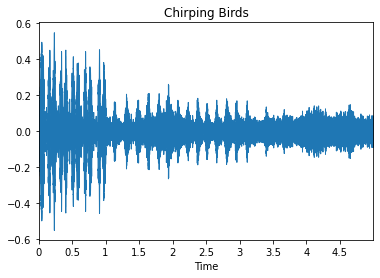

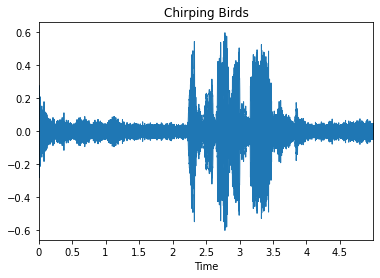

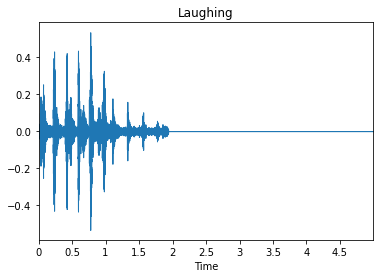

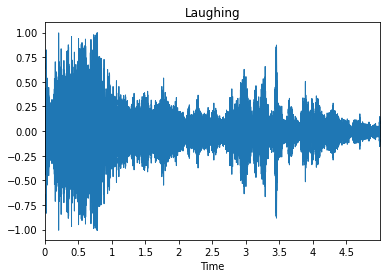

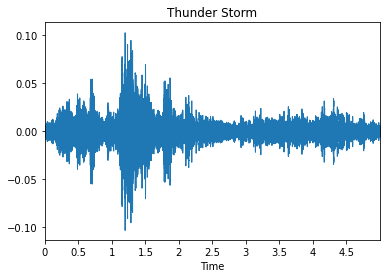

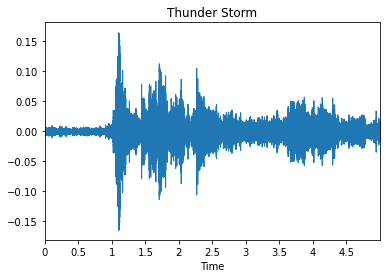

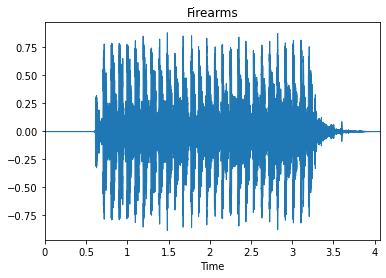

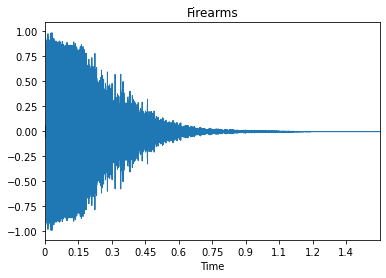

In [5]:
esc50audio_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/data/raw/ESC-50-master/audio/'

def plotWaveplot(audio_path,pd_filenames,title):
    '''pd_filenames is a pd.Series of strings
    title is a string of text for the plot title'''
    for file in pd_filenames:
        x,sr=librosa.load(audio_path+file,duration=5)
        plt.figure(figsize=(6,4))
        librosa.display.waveplot(x, sr=sr)
        plt.title(title)
    return

plotWaveplot(esc50audio_path,chrp_brds,'Chirping Birds')
plotWaveplot(esc50audio_path,laugh,'Laughing')
plotWaveplot(esc50audio_path,thndr_strm,'Thunder Storm')
plotWaveplot(firearm_path,firearm_audio[0:2],'Firearms')


## 2. MFCC Spectrograms

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


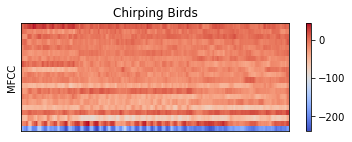

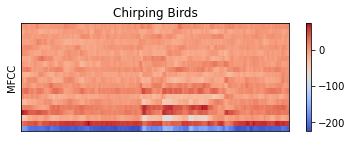

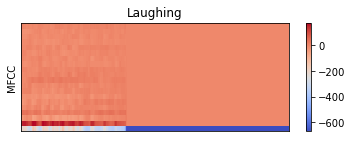

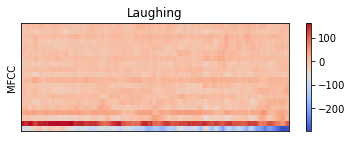

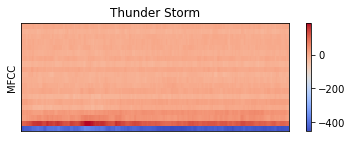

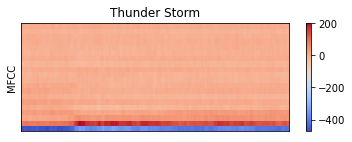

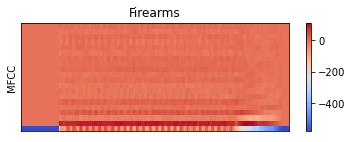

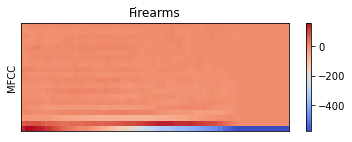

In [6]:
def plotMFCC(audio_path,pd_filenames,title):
    '''pd_filenames is a pd.Series containing strings
    title is a string of text for the plot title'''
    for file in pd_filenames:
        x,sr=librosa.load(audio_path+file,duration=5)
        mfcc=librosa.feature.mfcc(x)
        plt.figure(figsize=(6,2))
        librosa.display.specshow(mfcc)
        plt.ylabel('MFCC')
        plt.colorbar()
        plt.title(title)
    return

plotMFCC(esc50audio_path,chrp_brds,'Chirping Birds')
plotMFCC(esc50audio_path,laugh,'Laughing')
plotMFCC(esc50audio_path,thndr_strm,'Thunder Storm')
plotMFCC(firearm_path,firearm_audio[0:2],'Firearms')

With MFCC, it is now more straightforward to visually observe the differences between these categories. This feature can likely serve as an input in a model.

## 3. Log Mel Spectrograms


/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


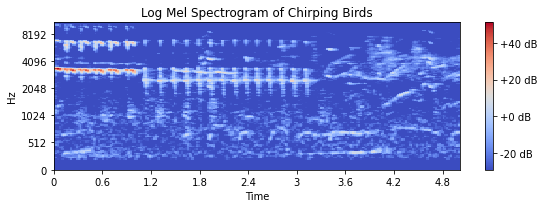

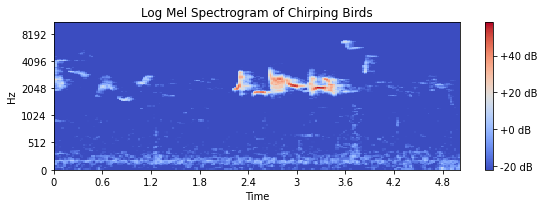

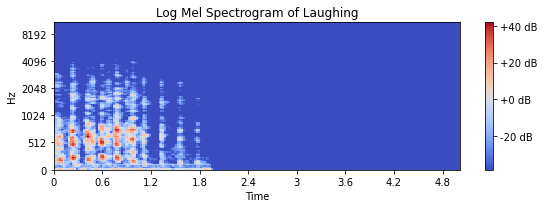

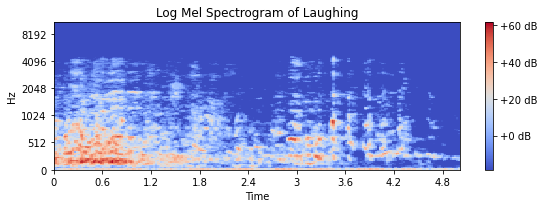

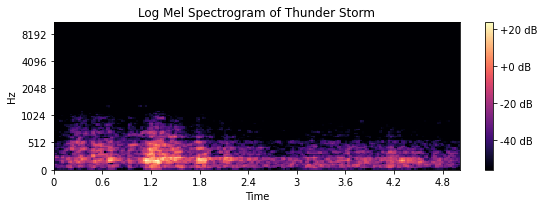

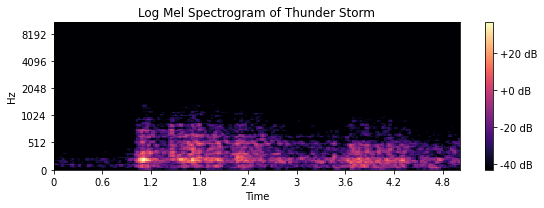

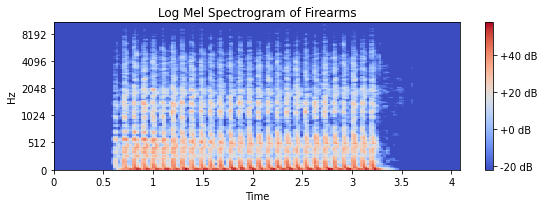

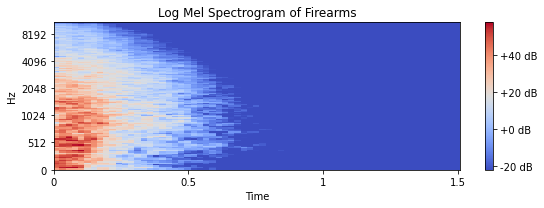

In [7]:
def plotLogMelSpec(audio_path,pd_filenames,title):
    '''pd_filenames is a pd.Series containing strings
    title is a string of text for the plot title'''
    for file in pd_filenames:
        x,sr=librosa.load(audio_path+file)
        melspec=librosa.feature.melspectrogram(x)
        log_S=librosa.amplitude_to_db(melspec)
        
        plt.figure(figsize=(8,3))
        librosa.display.specshow(log_S,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+02.0f dB')
        plt.title('Log Mel Spectrogram of '+ title)
        plt.tight_layout()
    return

plotLogMelSpec(esc50audio_path,chrp_brds,'Chirping Birds')
plotLogMelSpec(esc50audio_path,laugh,'Laughing')
plotLogMelSpec(esc50audio_path,thndr_strm,'Thunder Storm')
plotLogMelSpec(firearm_path,firearm_audio[0:2],'Firearms')

There are also some clear distinctions observed amongst these plots.  MFCC could be another feature used to feed into a classification model. 

## 4. Harmonic Percussive Source Separation

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


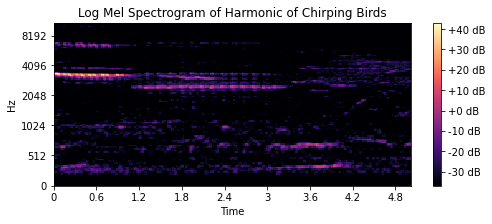

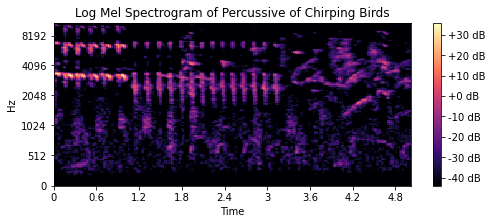

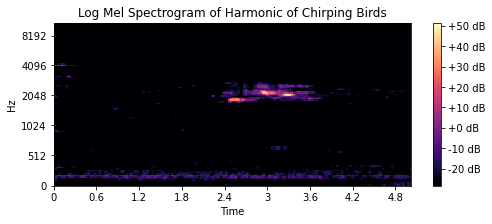

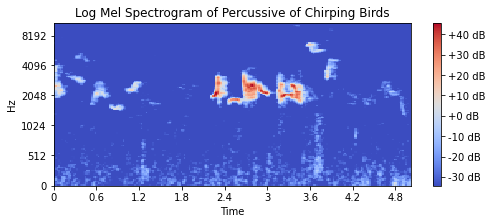

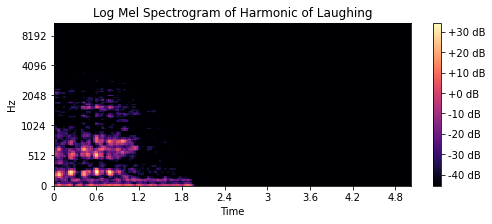

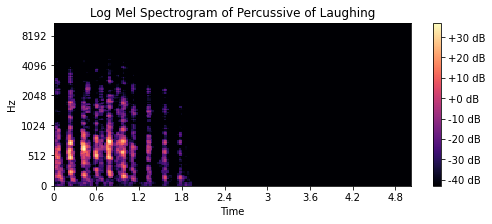

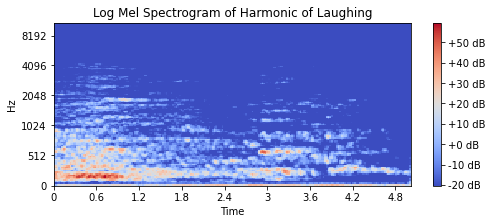

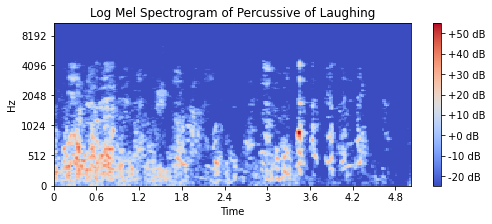

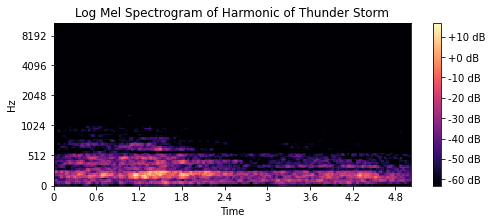

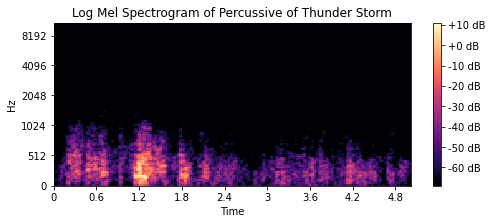

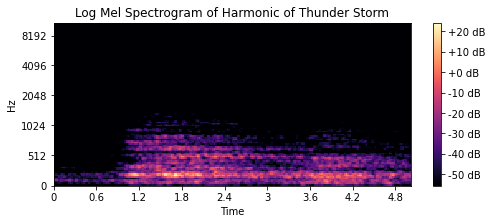

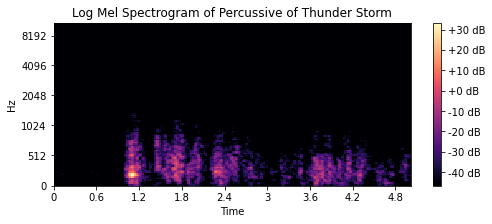

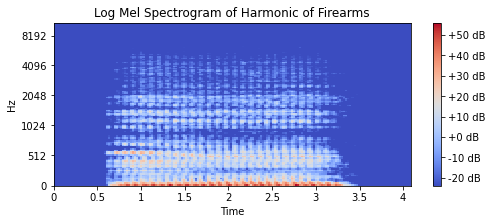

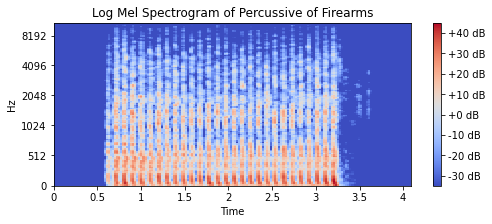

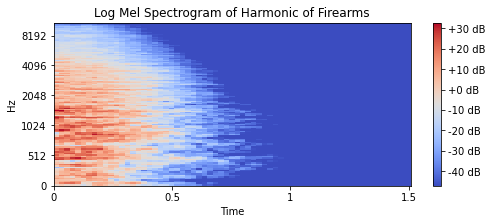

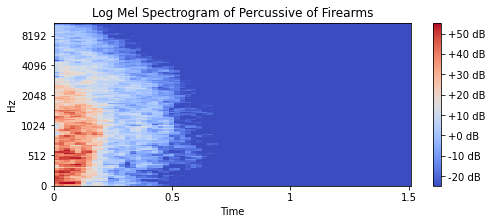

In [13]:
def plotHPSS(audio_path,pd_filenames,title):
    '''pd_filenames is a pd.Series containing strings
    title is a string of text for the plot title'''
    for file in pd_filenames:
        x,sr=librosa.load(audio_path+file)
        x_harmonic,x_percussive=librosa.effects.hpss(x)
        
        plt.figure(figsize=(8,3))
        melspec=librosa.feature.melspectrogram(x_harmonic)
        log_harmonic=librosa.amplitude_to_db(melspec)
        librosa.display.specshow(log_harmonic,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+02.0f dB')
        plt.title('Log Mel Spectrogram of Harmonic of '+title)
        
        plt.figure(figsize=(8,3))
        melspec=librosa.feature.melspectrogram(x_percussive)
        log_percussive=librosa.amplitude_to_db(melspec)
        librosa.display.specshow(log_percussive,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+02.0f dB')
        plt.title('Log Mel Spectrogram of Percussive of '+title)
    return

plotHPSS(esc50audio_path,chrp_brds,'Chirping Birds')
plotHPSS(esc50audio_path,laugh,'Laughing')
plotHPSS(esc50audio_path,thndr_strm,'Thunder Storm')
plotHPSS(firearm_path,firearm_audio[0:2],'Firearms')

## 5. Spectral Flatness
According to the librosa documentation, this feature is a measurement to help quantify how noise-like a sound is as opposed to being tone-like. 

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


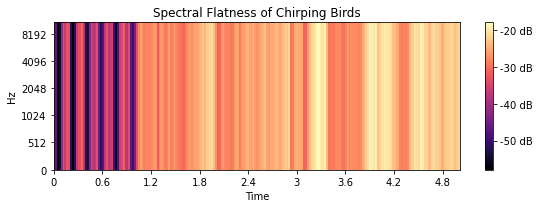

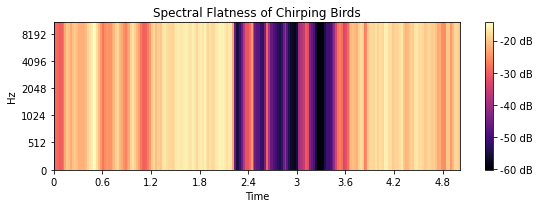

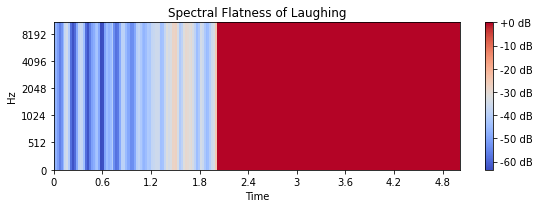

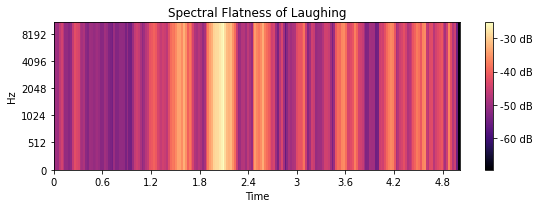

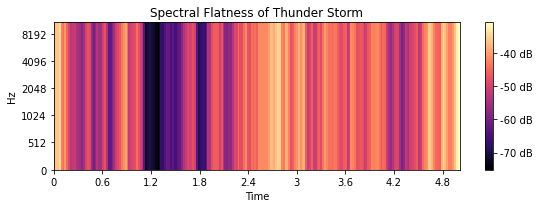

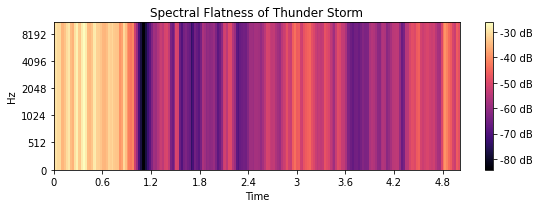

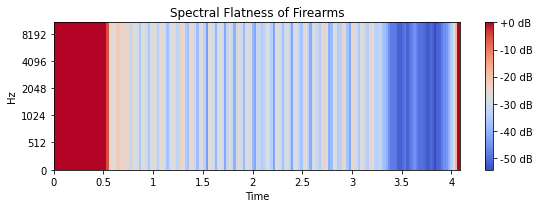

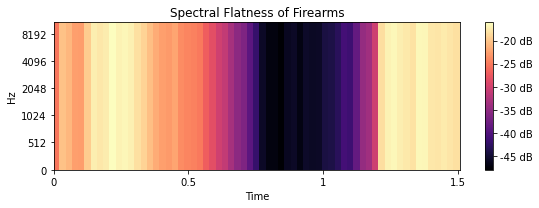

In [18]:
def plotSpecFlat(audio_path,pd_filenames,title):
    '''pd_filenames is a pd.Series containing strings
    title is a string of text for the plot title'''
    for file in pd_filenames:
        x,sr=librosa.load(audio_path+file)
        spec_flat=librosa.feature.spectral_flatness(x)
        log_S=librosa.amplitude_to_db(spec_flat)
        
        plt.figure(figsize=(8,3))
        librosa.display.specshow(log_S,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+02.0f dB')
        plt.title('Spectral Flatness of '+ title)
        plt.tight_layout()
    return

plotSpecFlat(esc50audio_path,chrp_brds,'Chirping Birds')
plotSpecFlat(esc50audio_path,laugh,'Laughing')
plotSpecFlat(esc50audio_path,thndr_strm,'Thunder Storm')
plotSpecFlat(firearm_path,firearm_audio[0:2],'Firearms')

There are also clear distinctions in these visualizations. 

## 6. Chroma

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


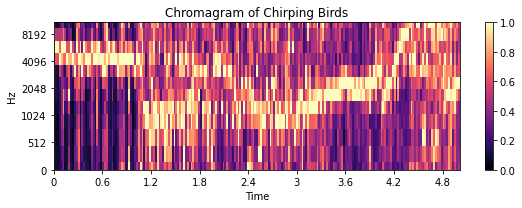

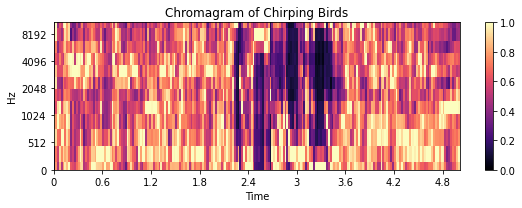

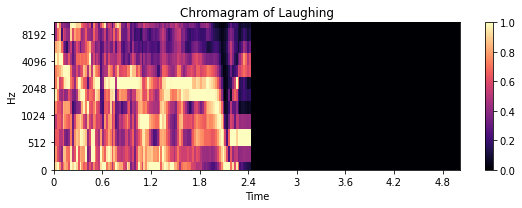

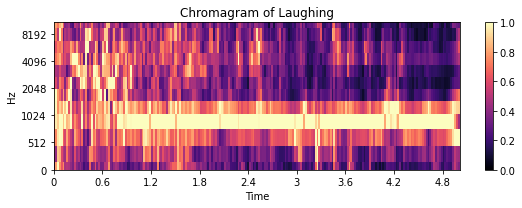

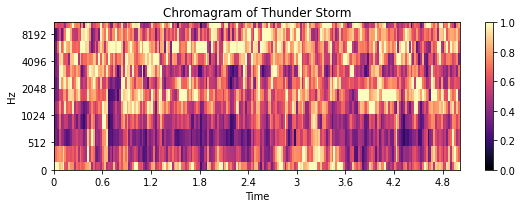

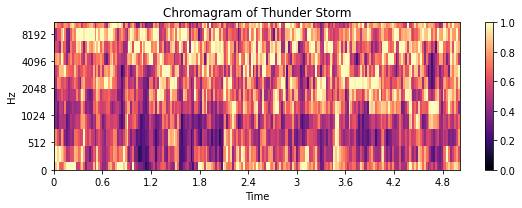

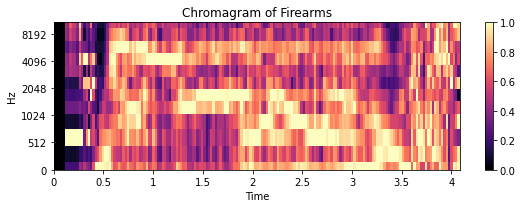

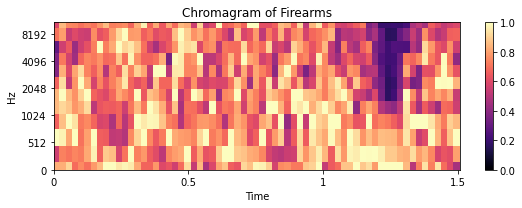

In [15]:
def plotChroma(audio_path,pd_filenames,title):
    '''pd_filenames is a pd.Series containing strings
    title is a string of text for the plot title'''
    for file in pd_filenames:
        x,sr=librosa.load(audio_path+file,duration=5)
        chroma=librosa.feature.chroma_cqt(y=x,sr=sr)
        #log_S=librosa.amplitude_to_db(chroma)
        
        plt.figure(figsize=(8,3))
        librosa.display.specshow(chroma,sr=sr,x_axis='time',y_axis='mel',vmin=0,vmax=1)
        plt.colorbar()
        plt.title('Chromagram of '+ title)
        plt.tight_layout()
    return

plotChroma(esc50audio_path,chrp_brds,'Chirping Birds')
plotChroma(esc50audio_path,laugh,'Laughing')
plotChroma(esc50audio_path,thndr_strm,'Thunder Storm')
plotChroma(firearm_path,firearm_audio[0:2],'Firearms')

While there are differences from category to category, the differences don't appear as obvious. 

## 7. Short Time Fourier Transform (STFT)

/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


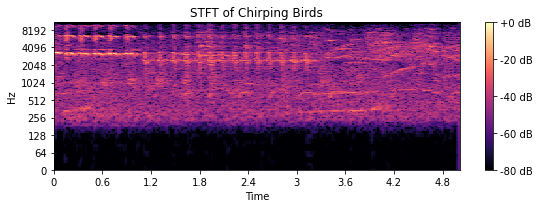

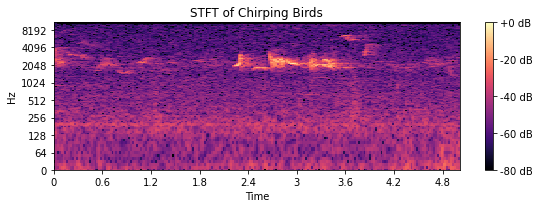

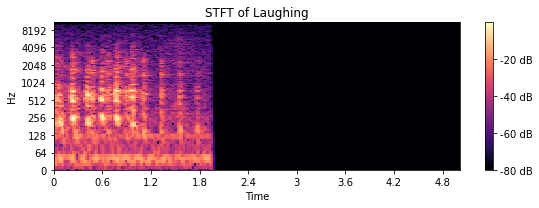

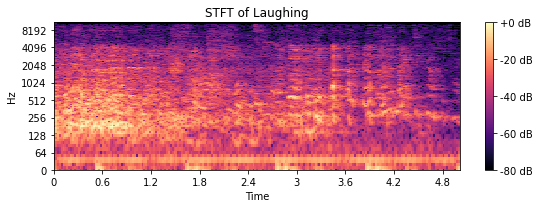

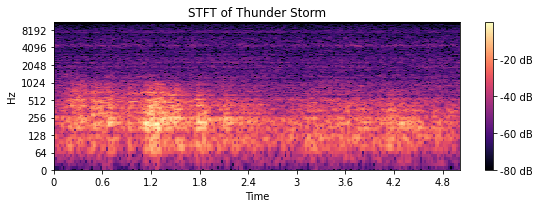

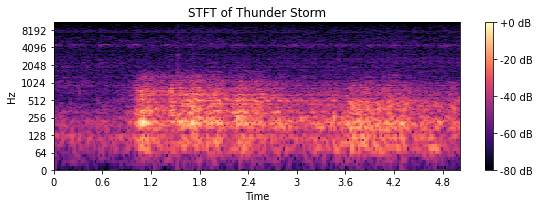

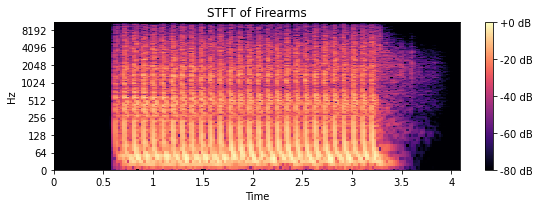

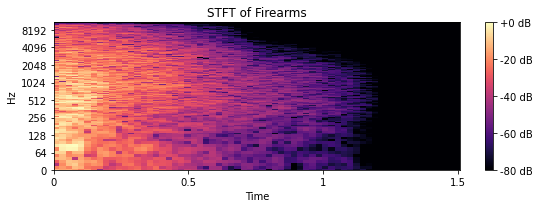

In [17]:
def plotSTFT(audio_path,pd_filenames,title):
    '''pd_filenames is a pd.Series containing strings
    title is a string of text for the plot title'''
    for file in pd_filenames:
        y,sr=librosa.load(audio_path+file,duration=5)
        stft=np.abs(librosa.stft(y))
        log_stft=librosa.amplitude_to_db(stft,ref=np.max)
        
        plt.figure(figsize=(8,3))
        librosa.display.specshow(log_stft,x_axis='time',y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('STFT of '+ title)
        plt.tight_layout()
    return

plotSTFT(esc50audio_path,chrp_brds,'Chirping Birds')
plotSTFT(esc50audio_path,laugh,'Laughing')
plotSTFT(esc50audio_path,thndr_strm,'Thunder Storm')
plotSTFT(firearm_path,firearm_audio[0:2],'Firearms')

## Summary
Some of the features that returned the most obvious distinctions between categories were the following: 
* MFCC
* Log mel spectrograms
* HPSS
* Spectral flatness

